### This notebook is to explore the dataset using visuals

In [209]:
# Dependencies
from ipynb.fs.full.prepare_data import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from scipy import stats
from scipy.stats import norm
import seaborn as sns

In [210]:
merged_sub_abuse_data.columns

Index(['CASEID', 'STFIPS_adm', 'AGE_adm', 'SERVICES', 'SUB1', 'SUB2',
       'DETCRIM_adm', 'NOPRIOR_adm', 'PSOURCE_adm', 'GENDER_adm', 'EDUC_adm',
       'EMPLOY_adm', 'METHUSE_adm', 'PSYPROB_adm', 'LIVARAG_adm',
       'PRIMINC_adm', 'HLTHINS_adm', 'PRIMPAY_adm', 'DETNLF_adm',
       'MARSTAT_adm', 'DAYWAIT_adm', 'ROUTE1_adm', 'FREQ1_adm', 'FRSTUSE1_adm',
       'ROUTE2_adm', 'FREQ2_adm', 'FRSTUSE2_adm', 'FREQ_ATND_SELF_HELP_adm',
       'DSMCRIT_adm', 'ALCFLG_adm', 'COKEFLG_adm', 'MARFLG_adm', 'HERFLG_adm',
       'OPSYNFLG_adm', 'HALLFLG_adm', 'BENZFLG_adm', 'OTHERFLG_adm',
       'REGION_adm', 'ALCDRUG_adm', 'YEAR', 'IDU_adm', 'STFIPS_dis', 'AGE_dis',
       'SERVICES_D', 'SUB1_D', 'SUB2_D', 'DETCRIM_dis', 'NOPRIOR_dis',
       'PSOURCE_dis', 'GENDER_dis', 'EDUC_dis', 'EMPLOY_dis', 'METHUSE_dis',
       'PSYPROB_dis', 'LIVARAG_dis', 'PRIMINC_dis', 'HLTHINS_dis',
       'PRIMPAY_dis', 'DETNLF_dis', 'MARSTAT_dis', 'DAYWAIT_dis', 'ROUTE1_dis',
       'FREQ1_dis', 'FRSTUSE1_dis', 'ROU

In [211]:
merged_sub_abuse_data.shape

(15649, 90)

In [212]:
# Create a dictionary to hold the chosen top 8 substances used.
top8_prim_subs_dict = {1:'NONE',2:'ALCOHOL', 3: 'COCAINE/CRACK', 4: 'MARIJUANA/HASHISH & OTH',
                                  5: 'HEROIN', 7: 'OTHER OPIATES AND SYNTHETICS',
                                  13: 'BENZODIAZEPINES', 19:'OTHER'}

In [213]:
# Group by Primary Substance
sub_freq_by_case_df = pd.DataFrame(merged_sub_abuse_data[['CASEID', 'SUB1']].groupby('SUB1').count())
sub_freq_by_case_df.rename(index=top8_prim_subs_dict, inplace=True)
sub_freq_by_case_df = sub_freq_by_case_df.reset_index()
sub_freq_by_case_df

,SUB1,CASEID
0,NONE,210
1,ALCOHOL,3145
2,COCAINE/CRACK,379
3,MARIJUANA/HASHISH & OTH,6204
4,HEROIN,4108
5,OTHER OPIATES AND SYNTHETICS,1130
6,BENZODIAZEPINES,272
7,OTHER,201


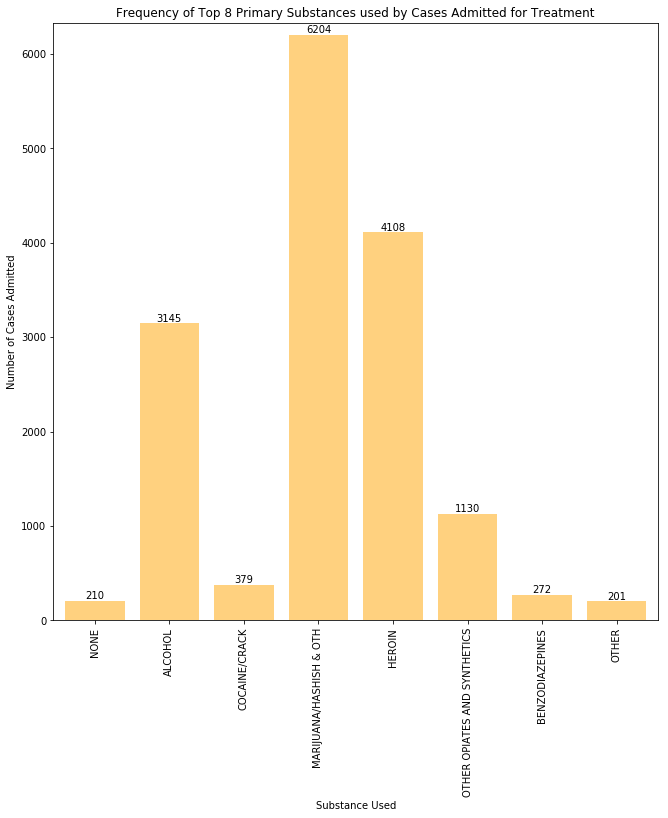

In [214]:
# Plot the frequecy of primary substance used against the cases admitted for treatment
plt.figure(figsize=(12,10))
bars = plt.bar(sub_freq_by_case_df['SUB1'], sub_freq_by_case_df['CASEID'], color='orange', alpha=0.5, align='center')
plt.xticks(sub_freq_by_case_df['SUB1'], rotation=90)
plt.title('Frequency of Top 8 Primary Substances used by Cases Admitted for Treatment')
plt.xlabel('Substance Used')
plt.ylabel('Number of Cases Admitted')
plt.margins(0.02)
plt.subplots_adjust(left=0.2,bottom=0.05)
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height,'%d' % int(height), ha='center', va='bottom')
plt.savefig(".\images\prisub_vs_cases_freq.png", bbox_inches='tight')
plt.show()

In [215]:
# Group by Primary, secondary Substance
subs_freq_by_case_df = pd.DataFrame(merged_sub_abuse_data[['CASEID', 'SUB1', 'SUB2']].groupby(['SUB1', 'SUB2']).count())
subs_freq_by_case_df.rename(index=top8_prim_subs_dict, inplace=True)
subs_freq_by_case_df = subs_freq_by_case_df.reset_index()
subs_freq_by_case_df

,SUB1,SUB2,CASEID
0,NONE,-9,1
1,NONE,NONE,209
2,ALCOHOL,-9,76
3,ALCOHOL,NONE,1398
4,ALCOHOL,COCAINE/CRACK,114
5,ALCOHOL,MARIJUANA/HASHISH & OTH,1179
6,ALCOHOL,HEROIN,67
7,ALCOHOL,6,3
8,ALCOHOL,OTHER OPIATES AND SYNTHETICS,63
9,ALCOHOL,8,2


In [216]:
# We are interested in how many of the cases admitted for treatment had one of the substances from
# the chosen primary substances
# To get that, we have to select all 'SUB2' are are in 'SUB1'-list
sub2_list = subs_freq_by_case_df['SUB2'].to_list()
print(sub2_list)

[-9, 'NONE', -9, 'NONE', 'COCAINE/CRACK', 'MARIJUANA/HASHISH & OTH', 'HEROIN', 6, 'OTHER OPIATES AND SYNTHETICS', 8, 9, 10, 11, 12, 'BENZODIAZEPINES', 15, 16, 17, 18, 'OTHER', -9, 'NONE', 'ALCOHOL', 'MARIJUANA/HASHISH & OTH', 'HEROIN', 'OTHER OPIATES AND SYNTHETICS', 8, 9, 10, 11, 'BENZODIAZEPINES', 16, 'OTHER', -9, 'NONE', 'ALCOHOL', 'COCAINE/CRACK', 'HEROIN', 6, 'OTHER OPIATES AND SYNTHETICS', 8, 9, 10, 11, 12, 'BENZODIAZEPINES', 14, 15, 16, 17, 18, 'OTHER', -9, 'NONE', 'ALCOHOL', 'COCAINE/CRACK', 'MARIJUANA/HASHISH & OTH', 6, 'OTHER OPIATES AND SYNTHETICS', 8, 9, 10, 11, 12, 'BENZODIAZEPINES', 14, 15, 16, 18, 'OTHER', -9, 'NONE', 'ALCOHOL', 'COCAINE/CRACK', 'MARIJUANA/HASHISH & OTH', 'HEROIN', 6, 8, 9, 10, 11, 12, 'BENZODIAZEPINES', 16, 17, 18, 'OTHER', -9, 'NONE', 'ALCOHOL', 'COCAINE/CRACK', 'MARIJUANA/HASHISH & OTH', 'HEROIN', 6, 'OTHER OPIATES AND SYNTHETICS', 9, 10, 11, 15, 16, 'OTHER', -9, 'NONE', 'ALCOHOL', 'COCAINE/CRACK', 'MARIJUANA/HASHISH & OTH', 'HEROIN', 9, 10, 'BENZODIA

In [217]:
subs_freq_by_case_df.loc[subs_freq_by_case_df['SUB2'].isin(sub2_list)]

,SUB1,SUB2,CASEID
0,NONE,-9,1
1,NONE,NONE,209
2,ALCOHOL,-9,76
3,ALCOHOL,NONE,1398
4,ALCOHOL,COCAINE/CRACK,114
5,ALCOHOL,MARIJUANA/HASHISH & OTH,1179
6,ALCOHOL,HEROIN,67
7,ALCOHOL,6,3
8,ALCOHOL,OTHER OPIATES AND SYNTHETICS,63
9,ALCOHOL,8,2
